In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import aux.ts_functions as ts
import seaborn as sns
import numpy as np
import warnings
import os
from scipy.stats import pearsonr
from IPython.display import Image

data_dir = "./../data/"

Important points to consider when choosing zone:
 - regularity (more regular = better)
 - toxicity (more toxic = better) 

# Loading

In [3]:
biotoxins = pd.read_excel(data_dir + 'biotoxins_preprocessed.xlsx', engine="openpyxl")
biotoxins

,Sample,Species,Sample_Point,Production_Area,Date,dsp_toxins,asp_toxins,psp_toxins
0,1,Mexilhão,Jangada,LAL,2015-01-05,20.0,1.8,71.0
1,20,Berbigão,Canal do Espinheiro,RIAV3,2015-01-05,36.0,1.8,71.0
2,19,Berbigão,Costa Nova,RIAV2,2015-01-05,26.0,1.8,71.0
3,18,Berbigão,Moacha,RIAV1,2015-01-05,36.0,1.8,71.0
4,17,Amêijoa-branca,Torreira,L3,2015-01-05,36.0,1.8,71.0
...,...,...,...,...,...,...,...,...
13714,2211,Mexilhão,Povoação,POR2,2020-12-29,36.0,1.8,NaN
13715,2212,Mexilhão,Aljezur,L7a,2020-12-29,36.0,NaN,NaN
13716,2213,Mexilhão,Garganta,OLH4,2020-12-29,36.0,NaN,NaN
13717,2199,Mexilhão,Caparica,L5b,2020-12-29,36.0,1.8,71.0


In [4]:
biotoxins_ts = pd.read_excel(data_dir + 'biotoxins_preprocessed.xlsx', index_col='Date', parse_dates=True,
                             engine="openpyxl")
biotoxins_ts

,Sample,Species,Sample_Point,Production_Area,dsp_toxins,asp_toxins,psp_toxins
Date,,,,,,,
2015-01-05,1,Mexilhão,Jangada,LAL,20.0,1.8,71.0
2015-01-05,20,Berbigão,Canal do Espinheiro,RIAV3,36.0,1.8,71.0
2015-01-05,19,Berbigão,Costa Nova,RIAV2,26.0,1.8,71.0
2015-01-05,18,Berbigão,Moacha,RIAV1,36.0,1.8,71.0
2015-01-05,17,Amêijoa-branca,Torreira,L3,36.0,1.8,71.0
...,...,...,...,...,...,...,...
2020-12-29,2211,Mexilhão,Povoação,POR2,36.0,1.8,NaN
2020-12-29,2212,Mexilhão,Aljezur,L7a,36.0,NaN,NaN
2020-12-29,2213,Mexilhão,Garganta,OLH4,36.0,NaN,NaN


In [5]:
phyto = pd.read_excel(data_dir + 'phytoplankton_preprocessed.xlsx', engine="openpyxl")
phyto

,Sample,Date,Production_Area,asp_phyto,dsp_phyto,psp_phyto
0,1809.0,2014-10-31,L6,20.0,20.0,20.0
1,1785.0,2014-11-03,LAL,20.0,20.0,20.0
2,1820.0,2014-11-03,RIAV4,20.0,20.0,20.0
3,1821.0,2014-11-03,L3,20.0,20.0,200.0
4,1823.0,2014-11-03,RIAV2,20.0,20.0,20.0
...,...,...,...,...,...,...
12216,1612.0,2020-12-29,L1,20.0,20.0,20.0
12217,1614.0,2020-12-29,POR2,440.0,40.0,20.0
12218,1615.0,2020-12-29,LAG,4760.0,20.0,20.0
12219,1616.0,2020-12-30,FAR2,2440.0,20.0,20.0


In [6]:
print(biotoxins["Production_Area"].value_counts())
print("-"*30)
print(f'{len(biotoxins["Production_Area"].unique())} unique production areas')
print("-"*30)
print(f'{biotoxins["Production_Area"].isna().sum()} NaN sample points')

RIAV2    933
RIAV1    930
LOB      669
L6       619
RIAV3    612
L2       552
L5b      432
LAL      430
L8       426
LAG      401
ETJ1     399
TAV      377
OLH2     377
L9       352
RIAV4    351
L3       331
OLH4     330
OLH5     320
FUZ      311
POR2     307
L7c2     305
L1       300
L7c1     295
FAR1     290
FAR2     287
OLH1     250
OLH3     249
ESD2     238
VT       221
L5a      178
ELM      177
GUA      163
POR3     162
ESD1     161
L7a      159
EMN2     157
EMR      150
L4       145
EMN1     123
L7b      121
L5        58
EMI       36
L7c       26
ETJ2       9
Name: Production_Area, dtype: int64
------------------------------
44 unique production areas
------------------------------
0 NaN sample points


# Choosing Production Area

Mexilhão used in all plots due to being the species with most data points

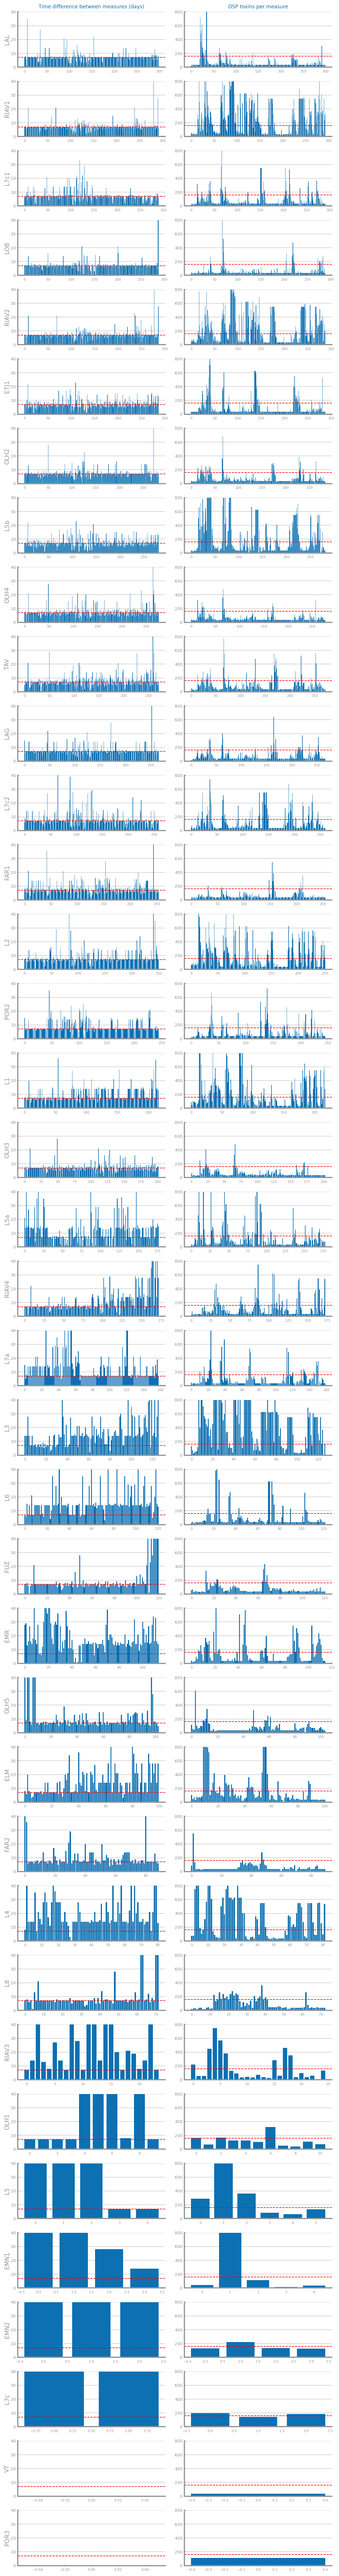

In [7]:
specie = "Mexilhão"
toxin = "dsp_toxins"
locations = biotoxins[biotoxins["Species"]==specie]["Production_Area"].value_counts().keys()

fig, axes = plt.subplots(len(locations),2,figsize=(8,60))

def plot_differences(df, location, specie, ax):
    df = df[ (df["Production_Area"] == location) & (df["Species"] == specie) ]
    days = []
    dates = df["Date"].tolist()
    for i in range(1, len(dates)):
        diff = dates[i] - dates[i-1]
        days.append(diff.days)

    ax.bar(range(len(days)), days)
    ax.axhline(7, linestyle="--", color="r", linewidth=1)
    

def plot_toxicity(df, toxin, location, specie, ax, line=None):
    df = df[ (df["Production_Area"] == location) & (df["Species"] == specie) ]
    toxins = df[toxin].tolist()
    ax.bar(range(len(toxins)), toxins)
    if line != None:
        ax.axhline(line, linestyle="--", color="r", linewidth=1)

        
def plot_phyto_toxicity(df, toxin, location, ax, line=None):
    df = df[ df["Production_Area"] == location ]
    toxins = df[toxin].tolist()
    ax.bar(range(len(toxins)), toxins)
    if line != None:
        ax.axhline(line, linestyle="--", color="r", linewidth=1)
    

for i, loc in enumerate(locations):
    plot_differences(biotoxins, loc, specie, axes[i][0])
    plot_toxicity(biotoxins, toxin, loc, specie, axes[i][1], line=160)


for ax, row in zip(axes, locations):
    ax[0].set_ylabel(row, size='medium')
    ax[0].set_ylim(0,40)
    ax[1].set_ylim(0,800)

axes[0][0].set_title("Time difference between measures (days)")
axes[0][1].set_title("DSP toxins per measure")

plt.tight_layout()  
plt.show()

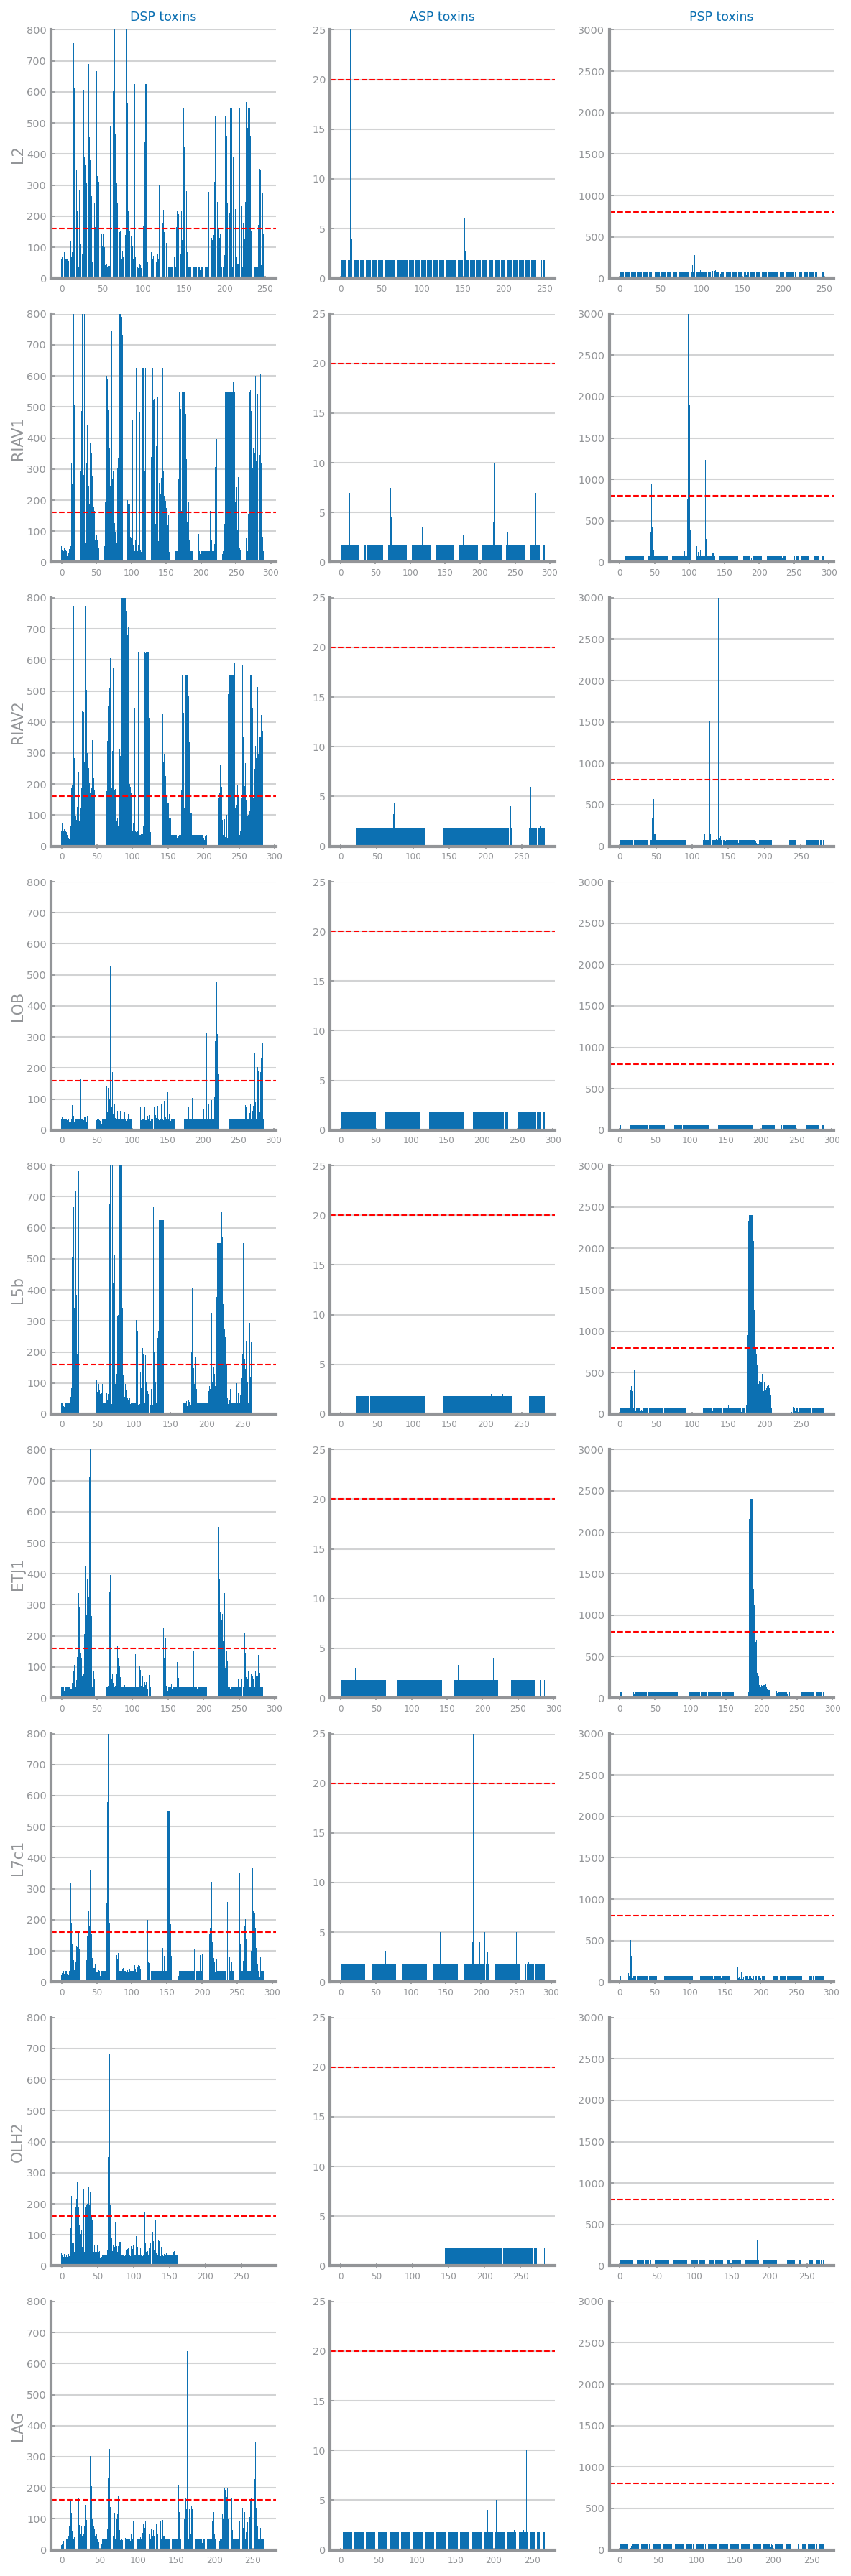

In [8]:
locations = ["L2", "RIAV1", "RIAV2", "LOB", "L5b", "ETJ1", "L7c1", "OLH2", "LAG"]
specie = "Mexilhão"
s = 8
fig, axes = plt.subplots(len(locations),3,figsize=(s, s*len(locations)/3))
for i, loc in enumerate(locations):
    plot_toxicity(biotoxins, "dsp_toxins", loc, specie, axes[i][0], line=160)
    plot_toxicity(biotoxins, "asp_toxins", loc, specie, axes[i][1], line=20)
    plot_toxicity(biotoxins, "psp_toxins", loc, specie, axes[i][2], line=800)


for ax, row in zip(axes, locations):
    ax[0].set_ylabel(row, size='medium')
    ax[0].set_ylim(0,800)
    ax[1].set_ylim(0,25)
    ax[2].set_ylim(0,3000)


axes[0][0].set_title("DSP toxins")
axes[0][1].set_title("ASP toxins")
axes[0][2].set_title("PSP toxins")

plt.tight_layout()  
plt.show()

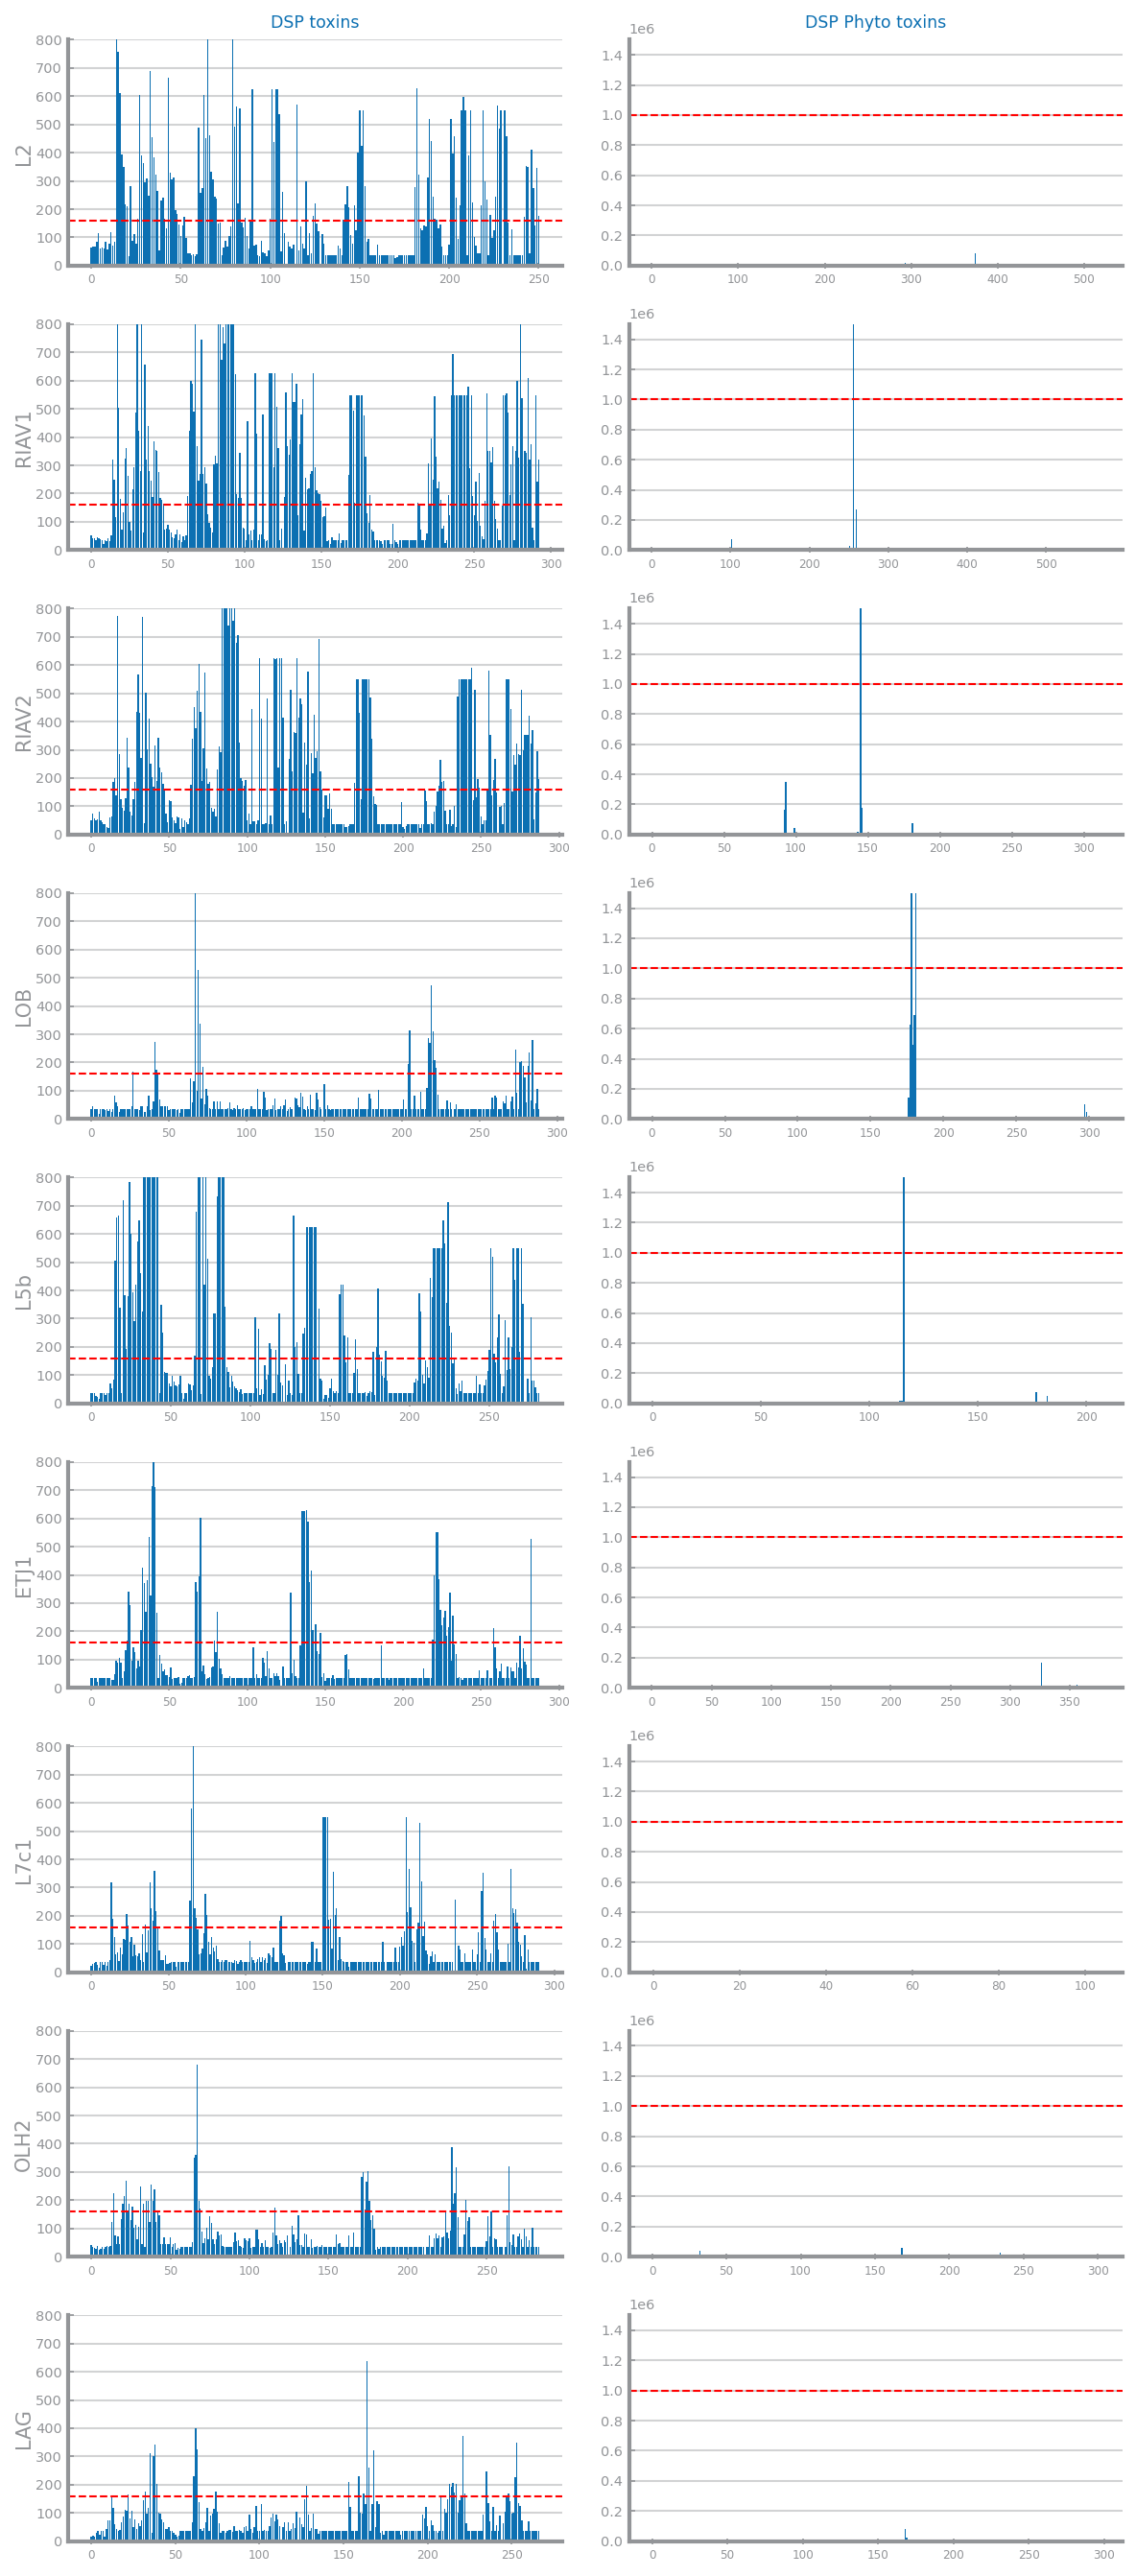

In [9]:
fig, axes = plt.subplots(len(locations),2,figsize=(s, s*len(locations)/4))
for i, loc in enumerate(locations):
    plot_toxicity(biotoxins, "dsp_toxins", loc, specie, axes[i][0], line=160)
    plot_phyto_toxicity(phyto, "dsp_phyto", loc, axes[i][1], line=1e6)


for ax, row in zip(axes, locations):
    ax[0].set_ylabel(row, size='medium')
    ax[0].set_ylim(0,800)
    ax[1].set_ylim(0,1.5e6)


axes[0][0].set_title("DSP toxins")
axes[0][1].set_title("DSP Phyto toxins")

plt.tight_layout()  
plt.show()

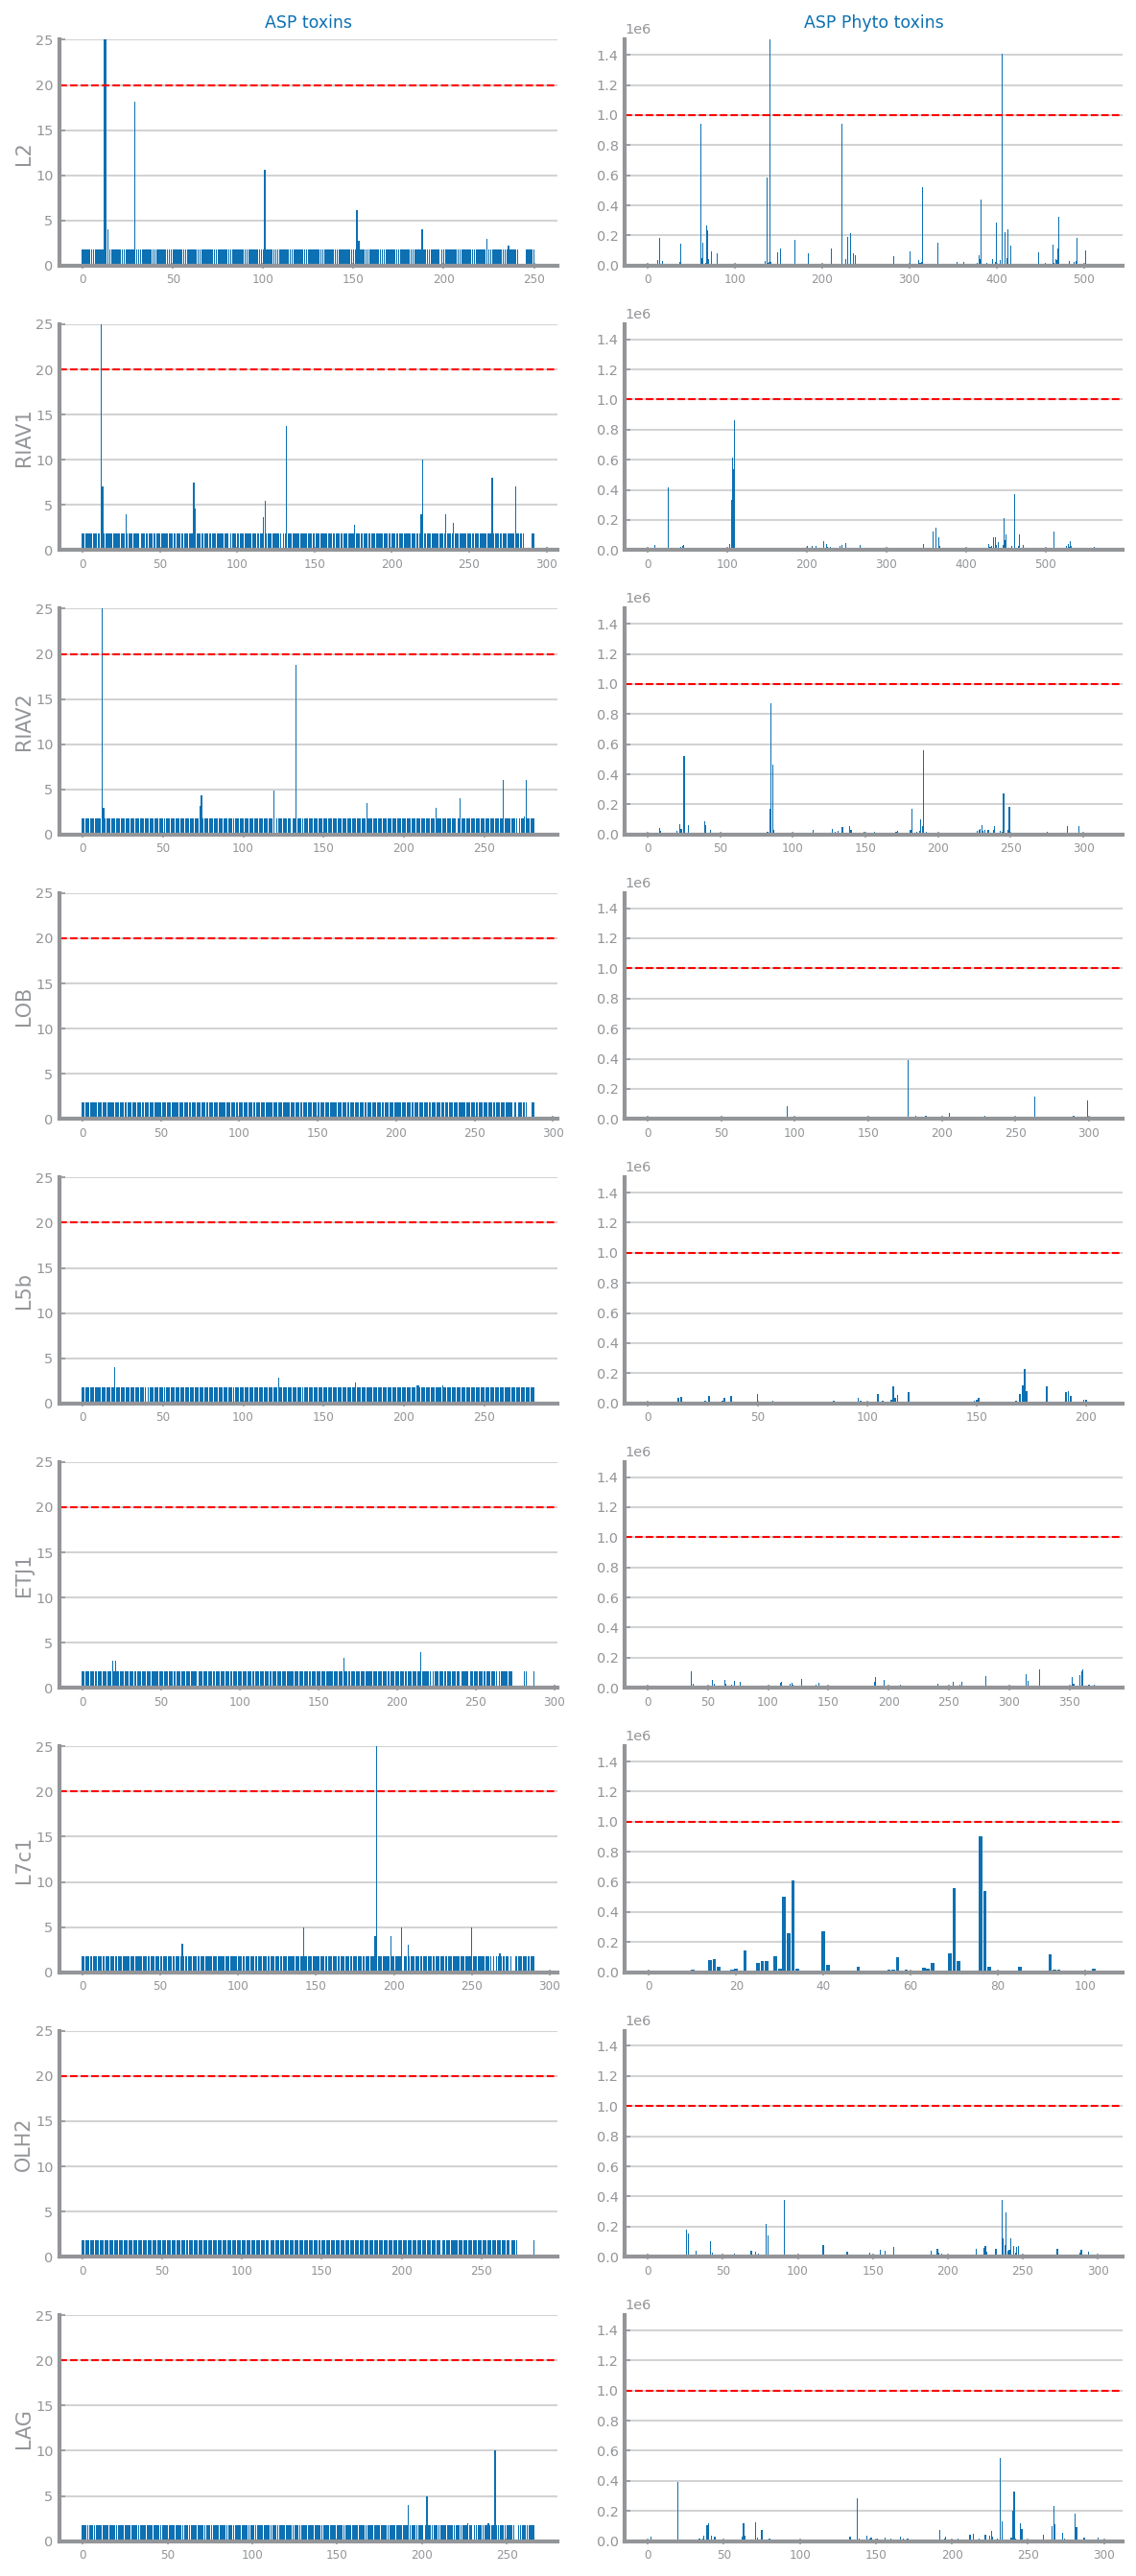

In [10]:
fig, axes = plt.subplots(len(locations),2,figsize=(s, s*len(locations)/4))
for i, loc in enumerate(locations):
    plot_toxicity(biotoxins, "asp_toxins", loc, specie, axes[i][0], line=20)
    plot_phyto_toxicity(phyto, "asp_phyto", loc, axes[i][1], line=1e6)


for ax, row in zip(axes, locations):
    ax[0].set_ylabel(row, size='medium')
    ax[0].set_ylim(0,25)
    ax[1].set_ylim(0,1.5e6)


axes[0][0].set_title("ASP toxins")
axes[0][1].set_title("ASP Phyto toxins")

plt.tight_layout()  
plt.show()

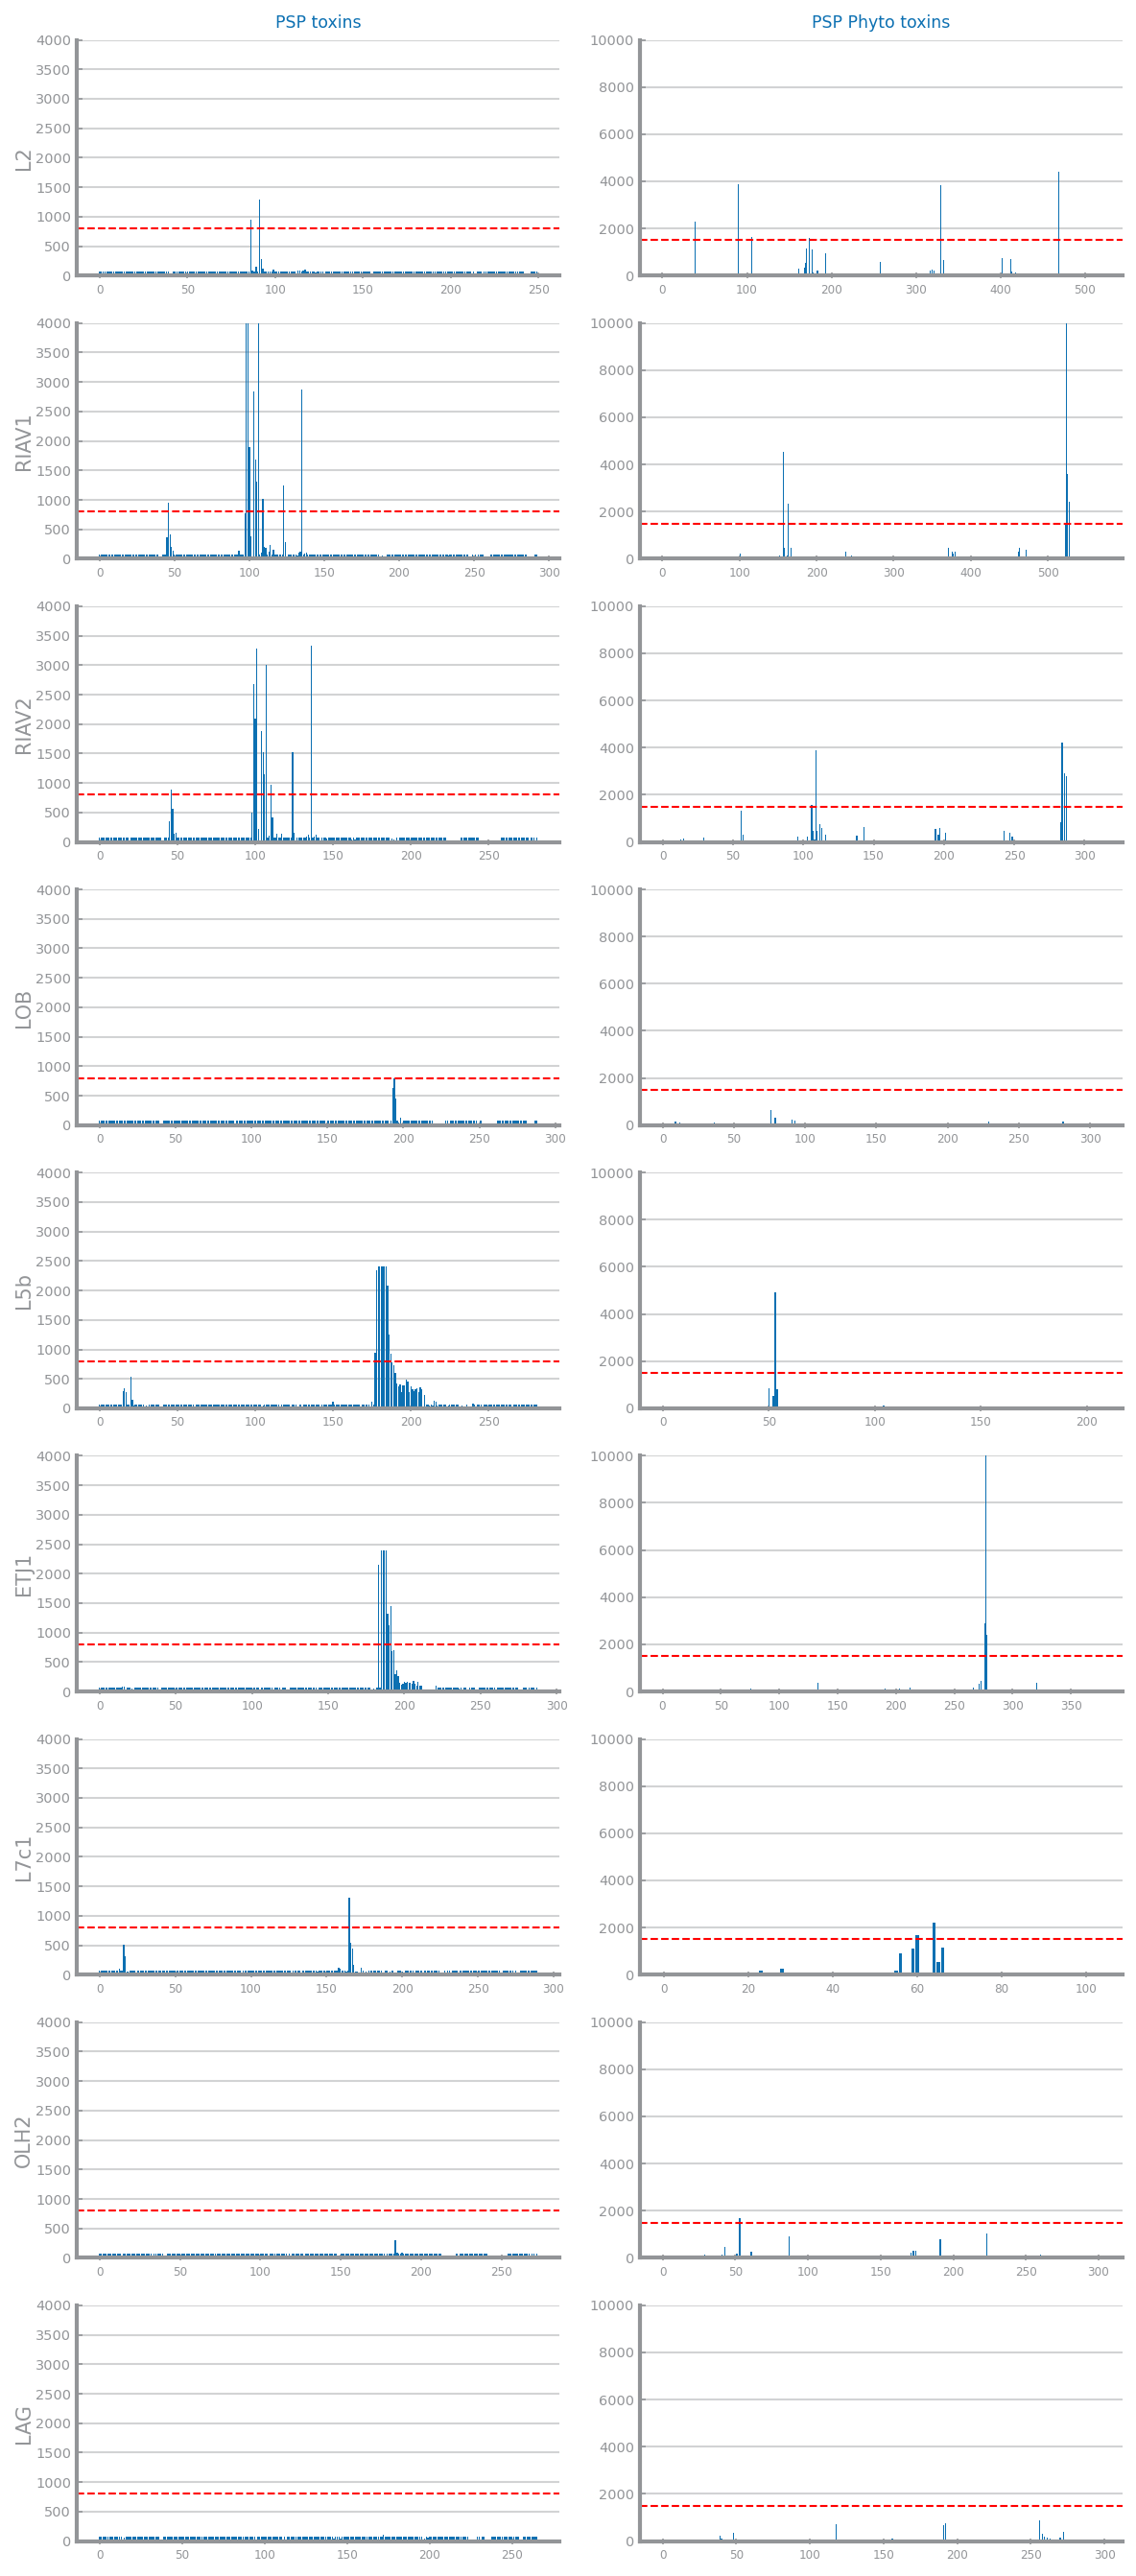

In [11]:
fig, axes = plt.subplots(len(locations),2,figsize=(s, s*len(locations)/4))
for i, loc in enumerate(locations):
    plot_toxicity(biotoxins, "psp_toxins", loc, specie, axes[i][0], line=800)
    plot_phyto_toxicity(phyto, "psp_phyto", loc, axes[i][1], line=1500)


for ax, row in zip(axes, locations):
    ax[0].set_ylabel(row, size='medium')
    ax[0].set_ylim(0,4000)
    ax[1].set_ylim(0,10000)


axes[0][0].set_title("PSP toxins")
axes[0][1].set_title("PSP Phyto toxins")

plt.tight_layout()  
plt.show()